In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
import missingno as msno
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## The data set includes information about:
Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replace the Empty String value at position 488 and converted the dtype to float

In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'].str.replace(' ','0'))

#### Dropping columns customer ID

In [6]:
df=df.drop('customerID',axis=1)

In [7]:
cols=df.columns
cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
cat_columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [9]:
for item in cat_columns:
    print(f'{item}\n')
    print(f'{df[item].value_counts()}')

gender

Male      3555
Female    3488
Name: gender, dtype: int64
SeniorCitizen

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Partner

No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents

No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService

Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DeviceProtection

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
TechSupport

No          

In [10]:
df=df.drop_duplicates()

## Checking for Missing Values

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can see above there are no missign values in the data lets just observe it visually once. 

<AxesSubplot:>

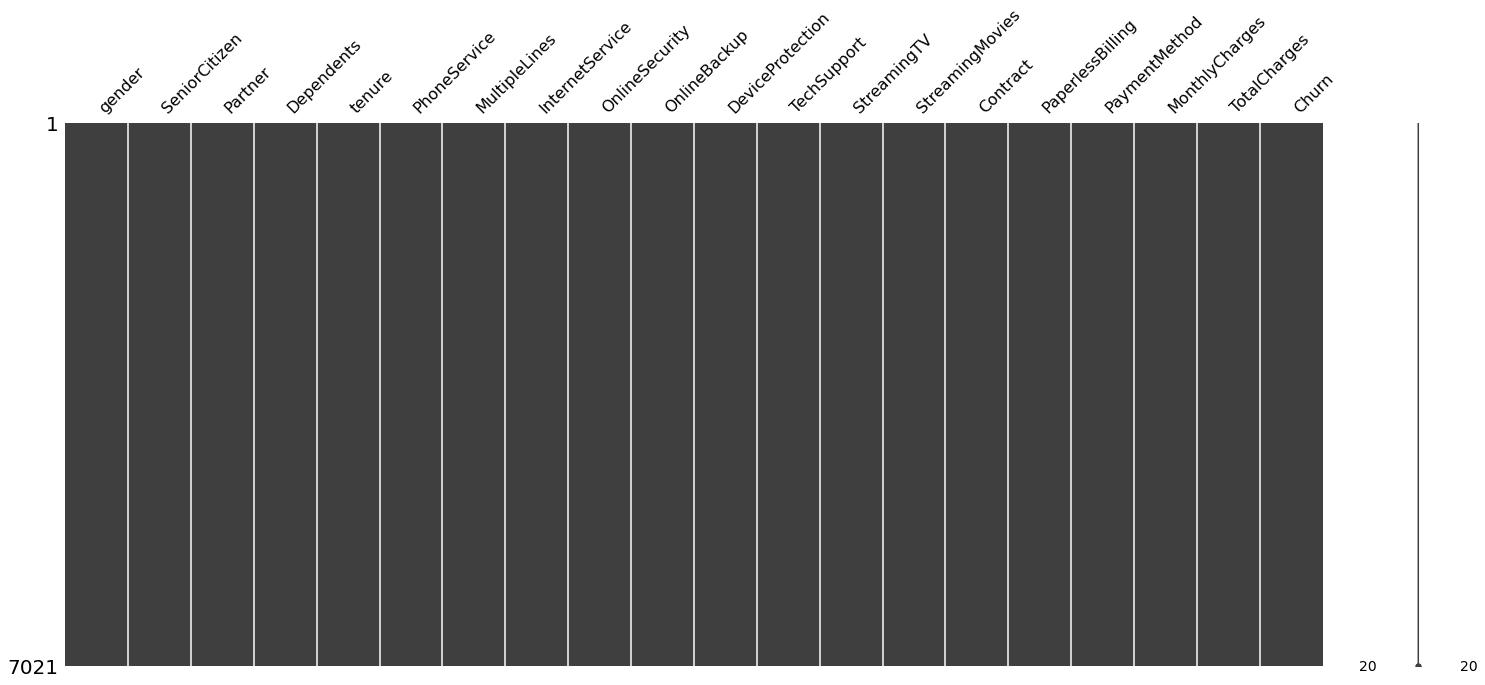

In [12]:
msno.matrix(df)

In [13]:
df['tenure'].value_counts()

1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [14]:
df[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


#### We can see that the bill has been generated for customers but the Tenure still shows as 0, deleting the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [15]:
df.drop(labels=df[df['tenure']==0].index, axis=0, inplace=True)

In [16]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


## Oulier Detection:
Seems like no outliers in the data lets confirm it once

In [17]:
def outlier_detection(data):
    anomalies=[]
    random_data_std=statistics.stdev(data)
    random_data_mean=statistics.mean(data)
    anomaly_cut_off=random_data_std * 3
    lower_limit=random_data_mean - anomaly_cut_off
    upper_limit=random_data_mean + anomaly_cut_off
    
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [18]:
outlier_detection(df['MonthlyCharges'])

[]

In [19]:
outlier_detection(df['TotalCharges'])

[]

In [20]:
outlier_detection(df['tenure'])

[]

## EDA

No     5153
Yes    1857
Name: Churn, dtype: int64
Percentage ofNo     73.509272
Yes    26.490728
Name: Churn, dtype: float64


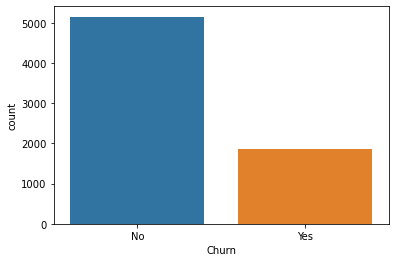

In [21]:
sns.countplot(df['Churn'])
print(f'{df["Churn"].value_counts()}')
print(f'Percentage of{df["Churn"].value_counts()/len(df["Churn"])*100}') 

Almost 1857 Customer churned during the last year and counts to almost 26.5% which is high

Male      3535
Female    3475
Name: gender, dtype: int64


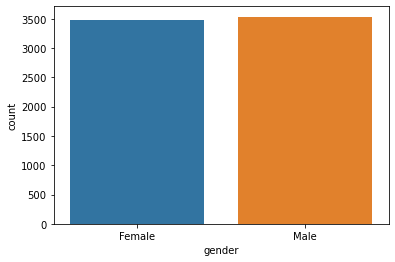

In [22]:
sns.countplot(df['gender'])
print(f'{df["gender"].value_counts()}')

In [23]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    934
Male      923
Name: Churn, dtype: int64

Equal amount of Male and Female customers switched to different firm

In [24]:
df['MultipleLines'][df['MultipleLines']=='No'].groupby(by=df['Churn']).count()

Churn
No     2526
Yes     837
Name: MultipleLines, dtype: int64

In [25]:
df['PhoneService'].value_counts()

Yes    6330
No      680
Name: PhoneService, dtype: int64

In [26]:
df['PhoneService'][df['PhoneService']=='Yes'].groupby(by=df['Churn']).count()


Churn
No     4643
Yes    1687
Name: PhoneService, dtype: int64

In [27]:
df['PhoneService'][df['PhoneService']=='No'].groupby(by=df['Churn']).count()

Churn
No     510
Yes    170
Name: PhoneService, dtype: int64

In [28]:
df['Contract'].value_counts()

Month-to-month    3853
Two year          1685
One year          1472
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='Count'>

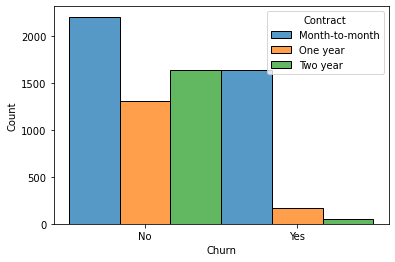

In [29]:
sns.histplot(x='Churn',hue='Contract',data=df,stat='count',multiple='dodge')

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

<AxesSubplot:>

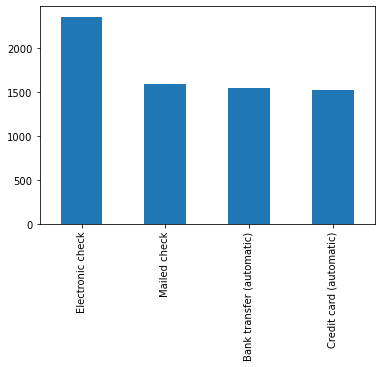

In [30]:
df.PaymentMethod.value_counts().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Churn', ylabel='Count'>

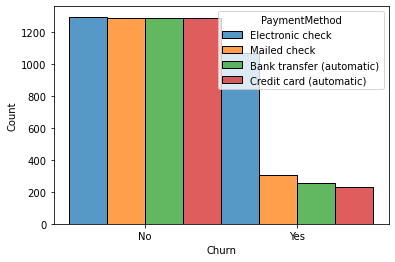

In [31]:
sns.histplot(x='Churn',hue='PaymentMethod',stat='count',data=df,multiple='dodge')

Major customers who moved out were having Electronic Check as Payment Method.
Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [32]:
df['InternetService'].value_counts()

Fiber optic    3090
DSL            2414
No             1506
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='Count'>

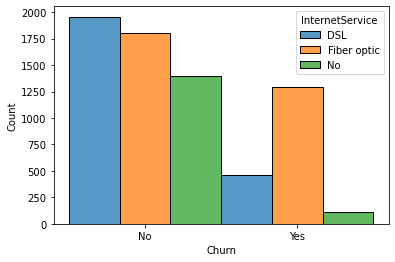

In [33]:
sns.histplot(x='Churn',hue='InternetService',stat='count',data=df,multiple='dodge')

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [34]:
df['Dependents'].value_counts()

No     4911
Yes    2099
Name: Dependents, dtype: int64

In [35]:
df['Dependents'][df['Dependents']=='Yes'].groupby(by=df['Churn']).count()

Churn
No     1773
Yes     326
Name: Dependents, dtype: int64

In [36]:
df['Dependents'][df['Dependents']=='No'].groupby(by=df['Churn']).count()

Churn
No     3380
Yes    1531
Name: Dependents, dtype: int64

Those customer who do not have dependents have churned 

In [37]:
df['OnlineSecurity'].value_counts()

No                     3489
Yes                    2015
No internet service    1506
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Count'>

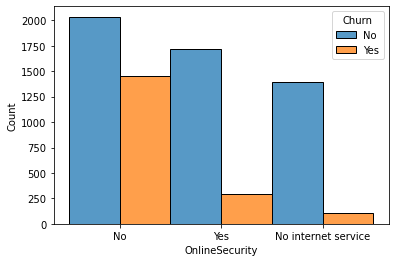

In [38]:
sns.histplot(x='OnlineSecurity', hue='Churn',data=df,multiple='dodge')

Thos with No onlince security tend to Chrun while thos who have no internet service tend to stay

<AxesSubplot:xlabel='Churn', ylabel='Count'>

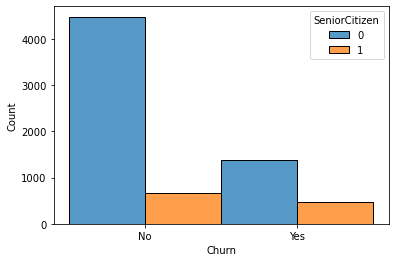

In [39]:
sns.histplot(x='Churn', hue='SeniorCitizen',data=df,multiple='dodge')

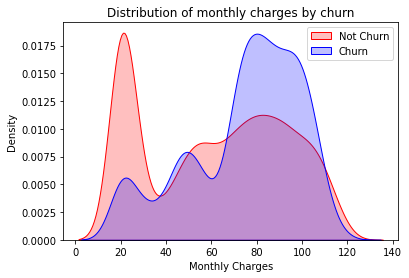

In [40]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Customers with higher Monthly Charges are also more likely to churn


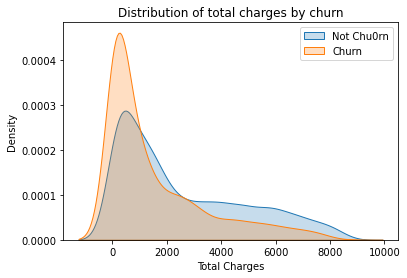

In [41]:
ax=sns.kdeplot(df.TotalCharges[(df["Churn"]=='No')],shade=True)
ax=sns.kdeplot(df.TotalCharges[(df["Churn"]=='Yes')],shade=True)
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

<AxesSubplot:>

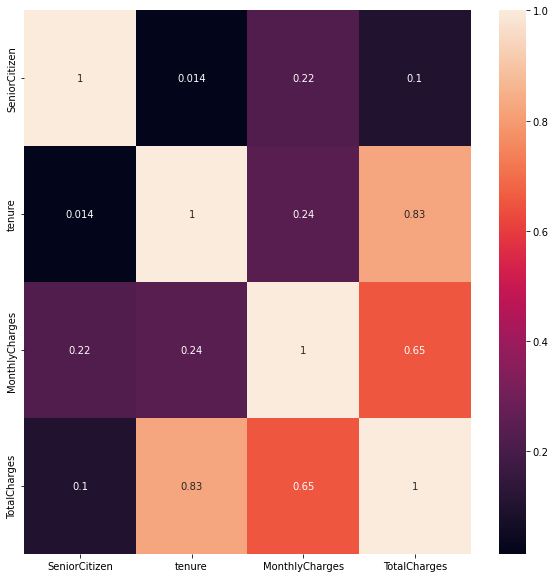

In [42]:
plt.figure(figsize=(10, 10))
corr=df.corr()
sns.heatmap(corr, annot=True)

Tenure Has a high correlation with Total Charges
Monthly charges has medium correlation with tenure and Senior citizen

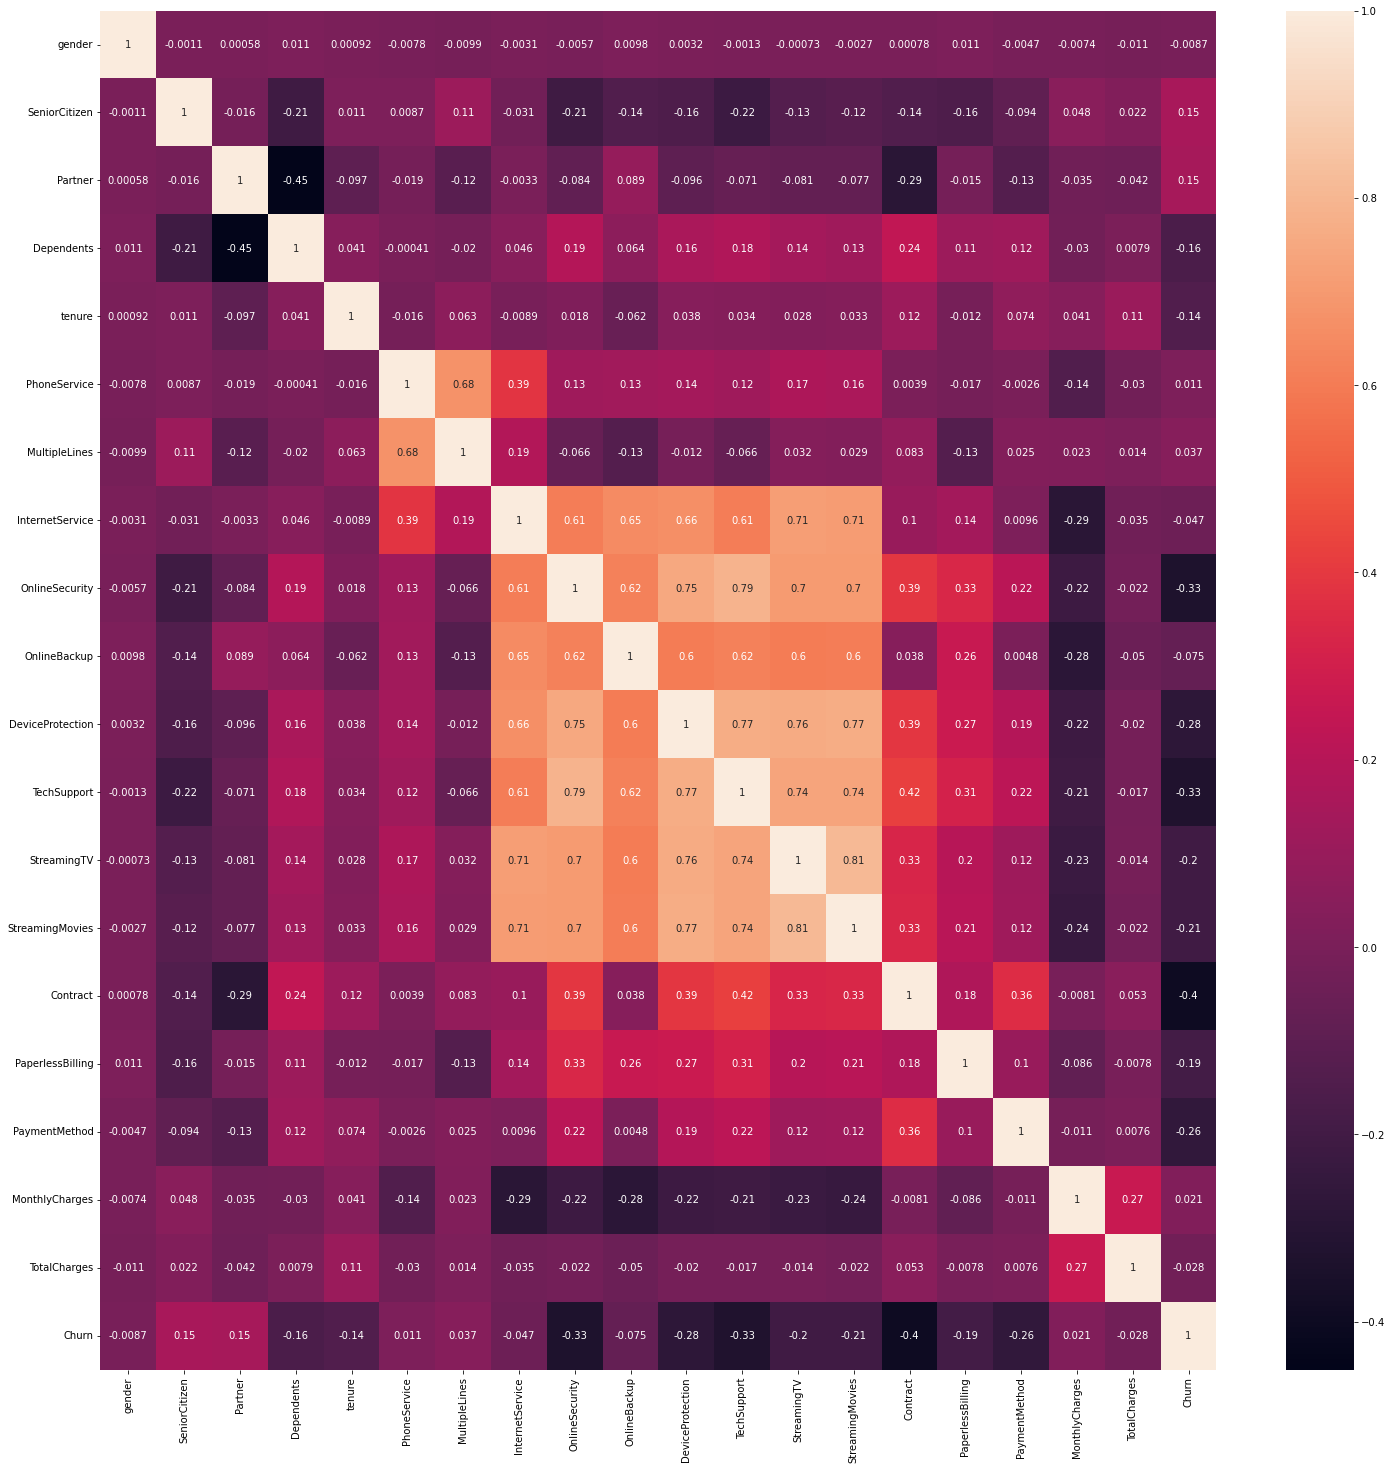

In [43]:
plt.figure(figsize=(25, 25))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr,annot=True)

## Data Preprocessing

### Encoding

In [44]:
def object_to_int(data):
    if data.dtype=='object':
        data=LabelEncoder().fit_transform(data)
    else:
        pass
    return data

In [45]:
df=df.apply(lambda x: object_to_int(x))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [46]:
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.194008
PaperlessBilling    0.190518
SeniorCitizen       0.151270
PaymentMethod       0.107032
MultipleLines       0.040181
PhoneService        0.011072
gender             -0.008694
StreamingTV        -0.034312
StreamingMovies    -0.036802
InternetService    -0.047169
Partner            -0.148670
Dependents         -0.162366
DeviceProtection   -0.176520
OnlineBackup       -0.193979
TotalCharges       -0.198362
TechSupport        -0.281394
OnlineSecurity     -0.288246
tenure             -0.353339
Contract           -0.395968
Name: Churn, dtype: float64

In [47]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

### Checking Distribution

In [49]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

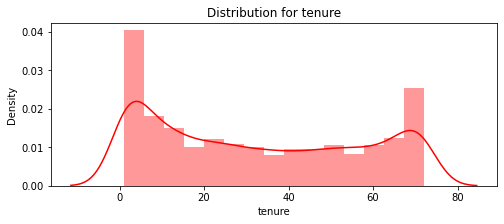

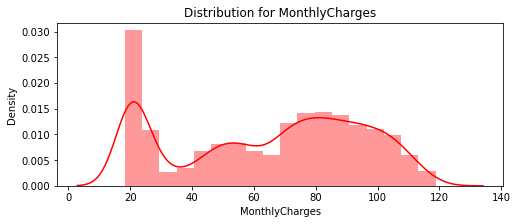

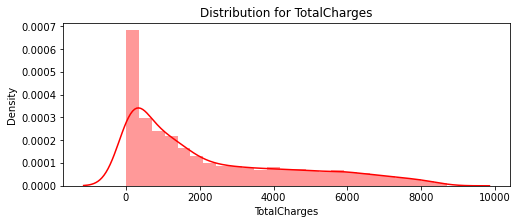

In [50]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

In [51]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [52]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe))

# Machine Learning Model Evaluations and Predictions

### KNN



In [53]:
for i in range(1,12):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    training_accuracy=accuracy_score(y_train, knn_model.predict(X_train))
    val_accuracy=cross_val_score(knn_model, X_train, y_train, cv=11)
    print('neighbors:',i, 'Training accuracy:', training_accuracy, "Cross val score:", np.mean(val_accuracy))


neighbors: 1 Training accuracy: 0.9975545139596494 Cross val score: 0.7165279970378234
neighbors: 2 Training accuracy: 0.8679437538210719 Cross val score: 0.7530089166258546
neighbors: 3 Training accuracy: 0.8671285918076218 Cross val score: 0.7485218756925501
neighbors: 4 Training accuracy: 0.8373751783166904 Cross val score: 0.7662516153803359
neighbors: 5 Training accuracy: 0.8373751783166904 Cross val score: 0.7591202298970078
neighbors: 6 Training accuracy: 0.8241287955981251 Cross val score: 0.7676784396771155
neighbors: 7 Training accuracy: 0.8212757285510495 Cross val score: 0.7619747904907566
neighbors: 8 Training accuracy: 0.8151620134501733 Cross val score: 0.7709402083555634
neighbors: 9 Training accuracy: 0.8151620134501733 Cross val score: 0.7725726886951193
neighbors: 10 Training accuracy: 0.8131241084165478 Cross val score: 0.775015937203315
neighbors: 11 Training accuracy: 0.8131241084165478 Cross val score: 0.7729780727794392


In [54]:
knn_model=KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_pred=knn_model.predict(X_test)
accuracy_knn=knn_model.score(X_test, y_test)
print('KNN Accuracy',accuracy_knn)

KNN Accuracy 0.7717546362339515


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1546
           1       0.60      0.43      0.50       557

    accuracy                           0.77      2103
   macro avg       0.70      0.66      0.68      2103
weighted avg       0.76      0.77      0.76      2103



### Decision Tree

In [56]:

    training_accuracy=accuracy_score(y_train, knn_model.predict(X_train))
    val_accuracy=cross_val_score(knn_model, X_train, y_train, cv=11)
    

In [57]:
for i in range(1,10):
    tree=DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    training_accuracy=accuracy_score(y_train, tree.predict(X_train))
    val_accuracy=cross_val_score(tree, X_train, y_train, cv=10)
    print('depth:',i, 'Training accuracy:', training_accuracy, "Cross val score:", np.mean(val_accuracy))


depth: 1 Training accuracy: 0.7350723456286937 Cross val score: 0.735072114385469
depth: 2 Training accuracy: 0.7538210719380477 Cross val score: 0.7393611538301675
depth: 3 Training accuracy: 0.7847972284491542 Cross val score: 0.7795008105075023
depth: 4 Training accuracy: 0.7919298960668433 Cross val score: 0.7831692921567811
depth: 5 Training accuracy: 0.7931526390870185 Cross val score: 0.7825578785485681
depth: 6 Training accuracy: 0.8080293458324842 Cross val score: 0.7790922315973232
depth: 7 Training accuracy: 0.8163847564703485 Cross val score: 0.7731796832786066
depth: 8 Training accuracy: 0.837578968820053 Cross val score: 0.7619747287917203
depth: 9 Training accuracy: 0.8591807621764825 Cross val score: 0.7597314934120288


In [58]:
tree=DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
accuracy_tree=tree.score(X_test, y_test)
print("Decision Tree accuracy is :",accuracy_tree)

Decision Tree accuracy is : 0.7931526390870185


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1546
           1       0.64      0.50      0.56       557

    accuracy                           0.79      2103
   macro avg       0.74      0.70      0.71      2103
weighted avg       0.78      0.79      0.78      2103

